In [2]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg \
    texlive texlive-latex-extra texlive-fonts-extra \
    texlive-latex-recommended texlive-science \
    tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [84.8 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:12 http://security.ubuntu.com/ubuntu bionic-security/universe amd64 Packages [1,496 kB]
Hit:13 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
G

     |████████████████████████████████| 793 kB 7.2 MB/s 
     |████████████████████████████████| 381 kB 53.3 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: IPython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but you have ipython 7.33.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.


In [1]:
from manim import *

Manim Community v0.15.2

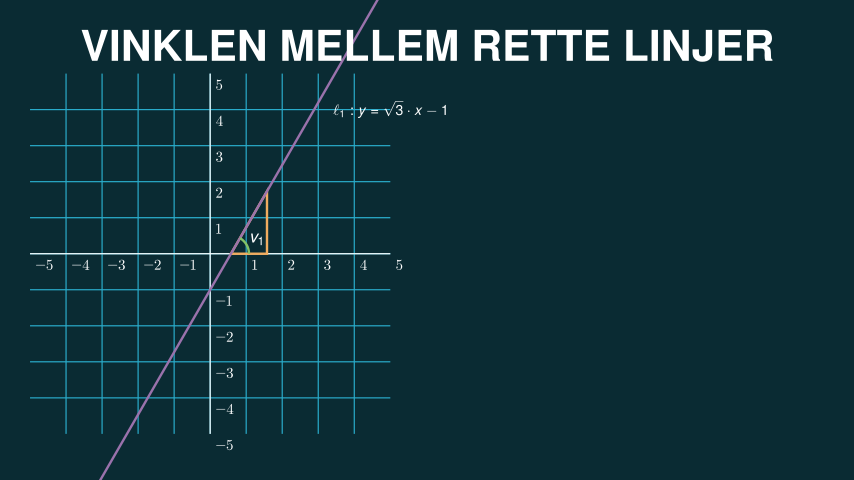

In [ ]:
%%manim -ql -v WARNING AngleBetweenLines

class AngleBetweenLines(Scene):
  def construct(self):
    myTemplate = TexTemplate()
    myTemplate.add_to_preamble(r"\usepackage[utf8]{inputenc}",prepend=True)
    myTemplate.add_to_preamble(r"\usepackage[scaled=0.95]{helvet}")
    myTemplate.add_to_preamble(r"\renewcommand\familydefault{\sfdefault}")
    myTemplate.add_to_preamble(r"\usepackage[T1]{fontenc}")
    myTemplate.add_to_preamble(r"\usepackage[helvet]{sfmath}")
    myTemplate.add_to_preamble(r"\usepackage{amsmath,bm}")
    myTemplate.add_to_preamble(r"\usepackage{upgreek}")
    
    self.camera.background_color=rgb_to_color(hex_to_rgb("#0A2C33"))

    title = Tex(r"\bf VINKLEN MELLEM RETTE LINJER",tex_template=myTemplate).scale(1.5).to_edge(UP).set_z_index(1)

    cs = NumberPlane(
        x_range = (-5,5,1),
        y_range = (-5,5,1),
        x_length = 6,
        y_length = 6,
    ).set_z_index(-1).add_coordinates().to_corner(DL)

    line1 = cs.plot(
        lambda x: np.sqrt(3)*x-1,
        x_range = (-20,20),
        color = PURPLE,
    )
    line1_tex = MathTex(r"\ell_1: y=\sqrt{3}\cdot x-1",tex_template=myTemplate).scale(0.5).next_to(cs.coords_to_point(3,4),RIGHT)

    # ANGLE BETWEEN X-AXIS AND LINE
    A = cs.coords_to_point(1/np.sqrt(3),0)
    B = cs.coords_to_point((1/np.sqrt(3)+1),0)
    C = cs.coords_to_point((1/np.sqrt(3)+1),np.sqrt(3))

    angle1 = Angle.from_three_points(B,A,C,radius=0.3).set_color(GREEN)
    angle1_tex = MathTex(r"v_1",tex_template=myTemplate).scale(0.6).next_to(angle1.point_from_proportion(0.3),UP+RIGHT,buff=0.05).set_z_index(0)

    slope1 = Polygon(A,B,C,color=GOLD).set_z_index(-1)

    self.add(title,cs,line1,line1_tex,angle1,angle1_tex,slope1)

In [ ]:
%%manim -ql -v WARNING ChangingAngle

class ChangingAngle(Scene):
  def construct(self):
    myTemplate = TexTemplate()
    myTemplate.add_to_preamble(r"\usepackage[utf8]{inputenc}",prepend=True)
    myTemplate.add_to_preamble(r"\usepackage[scaled=0.95]{helvet}")
    myTemplate.add_to_preamble(r"\renewcommand\familydefault{\sfdefault}")
    myTemplate.add_to_preamble(r"\usepackage[T1]{fontenc}")
    myTemplate.add_to_preamble(r"\usepackage[helvet]{sfmath}")
    myTemplate.add_to_preamble(r"\usepackage{amsmath,bm}")
    myTemplate.add_to_preamble(r"\usepackage{upgreek}")
    
    self.camera.background_color=rgb_to_color(hex_to_rgb("#0A2C33"))

# SETUP
    a = ValueTracker(np.sqrt(3))
    def func(x):
      return a.get_value() * x - (1/np.sqrt(3))*a.get_value()

# COORDINATE SYSTEM
    cs = NumberPlane(
        x_range = (-16/3,16/3),
        y_range = (-3,3),
        x_length = config["frame_width"],
        y_length = config["frame_height"],
    )
    
# LINES
    line1 = cs.plot(
        func, 
        x_range = (-20,20),
        color = PURPLE,
    ).set_z_index(1)
    line1.add_updater(
        lambda m: m.become(
            cs.plot(
                func,
                color = PURPLE,
            )
        ).set_z_index(1)
    )

# ANGLES    
    angle = AnnularSector(inner_radius = 0, 
                          outer_radius=0.3,
                          angle=np.arctan(a.get_value()),
                          start_angle=0,
                          color=GREEN,
                          fill_opacity=0.3,
                          arc_center=cs.c2p(1/np.sqrt(3),0),
                          stroke_width=2)
    angle.add_updater(
        lambda x: x.become(AnnularSector(inner_radius = 0, 
                          outer_radius=0.3,
                          angle=np.arctan(a.get_value()),
                          start_angle=0,
                          color=GREEN,
                          fill_opacity=0.3,
                          arc_center=cs.c2p(1/np.sqrt(3),0),
                          stroke_width=2)
        )
    )
    angle_tex = MathTex(r"v",tex_template=myTemplate).scale(0.6).move_to(
        AnnularSector(inner_radius = 0, 
                          outer_radius=0.3+3*SMALL_BUFF,
                          angle=np.arctan(a.get_value()),
                          start_angle=0,
                          color=GREEN,
                          fill_opacity=0.3,
                          arc_center=cs.c2p(1/np.sqrt(3),0),
                          ).point_from_proportion(0.5)).set_z_index(0)
    angle_tex.add_updater(
        lambda x: x.move_to(
            AnnularSector(inner_radius = 0, 
                          outer_radius=0.3+3*SMALL_BUFF,
                          angle=np.arctan(a.get_value()),
                          start_angle=0,
                          color=GREEN,
                          fill_opacity=0.3,
                          arc_center=cs.c2p(1/np.sqrt(3),0),
                          ).point_from_proportion(0.5)).set_z_index(0)
        )
    
    

# SLOPE
    run_tex = MathTex(r"1",tex_template=myTemplate).next_to(Line(cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),0),
              cs.coords_to_point(1/np.sqrt(3),0),
              ),DOWN)
    slope1 = Polygon(
          cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),0),
          cs.coords_to_point(1/np.sqrt(3),0),
          cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),func((np.sqrt(3)+1)/(np.sqrt(3)))),
          color = GOLD,
          ).set_z_index(-1)
    slope1.add_updater(
        lambda x: x.become(
            Polygon(
              cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),0),
              cs.coords_to_point(1/np.sqrt(3),0),
              cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),func((np.sqrt(3)+1)/(np.sqrt(3)))),
              color = GOLD,
           ).set_z_index(-1)
        )
    )
    slope1_tex = MathTex(r"a",tex_template=myTemplate).next_to(
        Line(
            cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),0),
            cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),func((np.sqrt(3)+1)/(np.sqrt(3)))),
          ).point_from_proportion(0.5),RIGHT).set_z_index(0)
    slope1_tex.add_updater(
        lambda x: x.next_to(
            Line(
            cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),0),
            cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),func((np.sqrt(3)+1)/(np.sqrt(3)))),
          ).point_from_proportion(0.5),RIGHT).set_z_index(0)
    )
            
    

    #self.add(cs,line1,angle1,angle1_tex,slope1,slope1_tex,run_tex)
    self.add(cs,line1,angle,angle_tex)
    self.wait()
    self.play(a.animate.set_value(5))
    self.wait()
    self.play(a.animate.set_value(0.2))
    self.wait()
    self.play(a.animate.set_value(np.sqrt(3)))
    self.wait(5)
#    self.play(a.animate.set_value(0.001))
#    self.remove(angle1,angle1_tex)
#    self.play(a.animate.set_value(-0.001))
#    self.add(angle2,angle2_tex)
    self.play(a.animate.set_value(-2))
    self.wait(5)


In [ ]:
%%manim -ql -v WARNING FindingIntersection

class FindingIntersection(MovingCameraScene):
  def construct(self):
    myTemplate = TexTemplate()
    myTemplate.add_to_preamble(r"\usepackage[utf8]{inputenc}",prepend=True)
    myTemplate.add_to_preamble(r"\usepackage[scaled=0.95]{helvet}")
    myTemplate.add_to_preamble(r"\renewcommand\familydefault{\sfdefault}")
    myTemplate.add_to_preamble(r"\usepackage[T1]{fontenc}")
    myTemplate.add_to_preamble(r"\usepackage[helvet]{sfmath}")
    myTemplate.add_to_preamble(r"\usepackage{amsmath,bm}")
    myTemplate.add_to_preamble(r"\usepackage{upgreek}")
    
    self.camera.background_color=rgb_to_color(hex_to_rgb("#0A2C33"))

    title = Tex(r"Vinklen mellem ",r"\bf linjer",tex_template=myTemplate).to_corner(UL)
    title[0].set_color(TEAL)
    #self.add_fixed_orientation_mobjects(title)
    
    cs = NumberPlane(
    #    x_range = (-32/3,32/3),
    #    y_range = (-6,6),
    #    x_length = 2*config["frame_width"],
    #    y_length = 2*config["frame_height"],
    ).shift(DOWN+1.5*LEFT)
    csLines = VGroup()
    for i in range(15):
      v_line = Line(start=12*UP,end=1*DOWN,color=BLUE,stroke_width=1)
      v_line.move_to(cs.c2p(-4+i,0))
      csLines.add(v_line)
    for i in range(12):
      h_line = Line(start=5*LEFT,end=16*RIGHT,color=BLUE,stroke_width=1)
      h_line.move_to(cs.c2p(0,-2+i))
      csLines.add(h_line)
    axisOne = Line(start=5*LEFT,end=16*RIGHT,color=WHITE,stroke_width=2).move_to(cs.c2p(0,0))
    axisTwo = Line(start=12*UP,end=1*DOWN,color=WHITE,stroke_width=2).move_to(cs.c2p(0,0))
    csLines.add(axisOne)
    csLines.add(axisTwo)
    self.camera.frame.move_to(cs.coords_to_point(-14.5,-31.04375)) 


    a1 = ValueTracker(2)
    a2 = ValueTracker(2.075)
    b1 = np.sqrt(3)#40/3
    b2 = 0#86/3
    
    def func1(x):
      return a1.get_value() * x + (b2-a1.get_value()*b1)
    
    def func2(x):
      return a2.get_value() * x + (b2-a2.get_value()*b1)

    line1 = cs.plot(
        func1,
        x_range=(-110,10),
        color=PURPLE,
    )
    line2 = cs.plot(
        func2,
        x_range=(-110,10),
        color=BLUE
    )

    line1.add_updater(
        lambda m: m.become(
            cs.plot(
                func1,
                x_range=(-110,10),
                color = PURPLE,
            )
        ).set_z_index(1)
    )
    line2.add_updater(
        lambda m: m.become(
            cs.plot(
                func2,
                x_range=(-110,10),
                color=BLUE
            )
        ).set_z_index(1)
    )

    x_val = ((b2-a1.get_value()*b1)-(b2-a2.get_value()*b1))/(a2.get_value()-a1.get_value())
    y_val = a1.get_value() * x_val + (b2-a1.get_value()*b1)
    intersect = Dot(point=cs.c2p(x_val,y_val)).set_z_value(3)
    
    #leg1 = Line(start=cs.c2p(40/3,86/3),end=cs.c2p(16,func1(16))).rotate(-0.02*PI,about_point=cs.c2p(40/3,86/3))
    #leg2 = Line(start=cs.c2p(40/3,86/3),end=cs.c2p(16,func2(16))).rotate(0.02*PI,about_point=cs.c2p(40/3,86/3))
    #angle = Angle(leg1,leg2,radius=4,color=GREEN)
    #angle = AnnularSector(inner_radius = 0, 
    #                      outer_radius=4,
    #                      angle=np.arctan((func2(16)-86/3)/(16-40/3))-np.arctan((func1(16)-86/3)/(16-40/3)),
    #                      start_angle=np.arctan((func1(16)-86/3)/(16-40/3)),
    #                      color=GREEN,
    #                      fill_opacity=0.3,
    #                      arc_center=cs.c2p(40/3,86/3),
    #                      stroke_width=2)

# ANGLES    
    angle2 = AnnularSector(inner_radius = 0, 
                          outer_radius=0.3,
                          angle=np.arctan(a1.get_value()),
                          start_angle=0,
                          color=GREEN,
                          fill_opacity=0.3,
                          arc_center=cs.c2p(-(b2-a1.get_value()*b1)/a1.get_value(),0),
                          stroke_width=2)
    angle2.add_updater(
        lambda x: x.become(AnnularSector(inner_radius = 0, 
                          outer_radius=0.3,
                          angle=np.arctan(a1.get_value()),
                          start_angle=0,
                          color=GREEN,
                          fill_opacity=0.3,
                          arc_center=cs.c2p(-(b2-a1.get_value()*b1)/a1.get_value(),0),
                          stroke_width=2)
        )
    )
    angle2_tex = MathTex(r"v",tex_template=myTemplate).scale(0.6).move_to(
        AnnularSector(inner_radius = 0, 
                          outer_radius=0.3+3*SMALL_BUFF,
                          angle=np.arctan(a1.get_value()),
                          start_angle=0,
                          color=GREEN,
                          fill_opacity=0.3,
                          arc_center=cs.c2p(-(b2-a1.get_value()*b1)/a1.get_value(),0),
                          ).point_from_proportion(0.5)).set_z_index(0)
    angle2_tex.add_updater(
        lambda x: x.move_to(
            AnnularSector(inner_radius = 0, 
                          outer_radius=0.3+3*SMALL_BUFF,
                          angle=np.arctan(a1.get_value()),
                          start_angle=0,
                          color=GREEN,
                          fill_opacity=0.3,
                          arc_center=cs.c2p(-(b2-a1.get_value()*b1)/a1.get_value(),0),
                          ).point_from_proportion(0.5)).set_z_index(0)
        )
    
    

# SLOPE
    run_tex = MathTex(r"1",tex_template=myTemplate).next_to(Line(cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),0),
              cs.coords_to_point(1/np.sqrt(3),0),
              ),DOWN)
    slope1 = Polygon(
          #cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),0),
          #cs.coords_to_point(1/np.sqrt(3),0),
          #cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),func1((np.sqrt(3)+1)/(np.sqrt(3)))),
          cs.c2p(-(b2-a1.get_value()*b1)/a1.get_value(),0),
          cs.c2p((-(b2-a1.get_value()*b1)/a1.get_value())+1,0),
          cs.c2p((-(b2-a1.get_value()*b1)/a1.get_value())+1,func1((-(b2-a1.get_value()*b1)/a1.get_value())+1)),
          color = GOLD,
          ).set_z_index(-1)
    slope1.add_updater(
        lambda x: x.become(
            Polygon(
              #cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),0),
              #cs.coords_to_point(1/np.sqrt(3),0),
              #cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),func1((np.sqrt(3)+1)/(np.sqrt(3)))),
              cs.c2p(-(b2-a1.get_value()*b1)/a1.get_value(),0),
              cs.c2p((-(b2-a1.get_value()*b1)/a1.get_value())+1,0),
              cs.c2p((-(b2-a1.get_value()*b1)/a1.get_value())+1,func1((-(b2-a1.get_value()*b1)/a1.get_value())+1)),
              color = GOLD,
           ).set_z_index(-1)
        )
    )
    slope1_tex = MathTex(r"a",tex_template=myTemplate).next_to(
        Line(
            cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),0),
            cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),func1((np.sqrt(3)+1)/(np.sqrt(3)))),
          ).point_from_proportion(0.5),RIGHT).set_z_index(0)
    slope1_tex.add_updater(
        lambda x: x.next_to(
            Line(
            cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),0),
            cs.coords_to_point((np.sqrt(3)+1)/(np.sqrt(3)),func1((np.sqrt(3)+1)/(np.sqrt(3)))),
          ).point_from_proportion(0.5),RIGHT).set_z_index(0)
    )

    self.play(Write(title))
    #self.add(line1,line2,intersect)
    self.play(Create(line1),Create(line2))
    self.add(intersect)
    self.wait()
    self.play(self.camera.frame.animate.move_to(cs.coords_to_point(3,2)))
    self.wait()
    self.play(a1.animate.set_value(2.585),
              a2.animate.set_value(1.655),
              intersect.animate.scale(2).set_z_index(3),
              line1.animate.set_stroke(width=4),
        )
    
    angle = AnnularSector(inner_radius = 0, 
                          outer_radius=4,
                          angle=np.arctan((func2(16)-b2)/(16-b1))-np.arctan((func1(16)-b2)/(16-b1)),
                          start_angle=np.arctan((func1(16)-b2)/(16-b1)),
                          color=GREEN,
                          fill_opacity=0.3,
                          arc_center=cs.c2p(b1,b2),
                          stroke_width=2)
    #self.wait()
    
    self.add(angle)
    self.wait()
    self.play(FadeOut(angle),FadeOut(line2),FadeOut(intersect))
#    self.play(Create(cs))
#    self.wait()
#    self.play(FadeOut(cs))
    self.play(Create(csLines))
    self.wait()
    self.play(Create(angle2),Write(angle2_tex))
    self.wait()
    self.play(a1.animate.set_value(1.5),run_time=2)
    self.play(a1.animate.set_value(5),run_time=2)
    self.play(a1.animate.set_value(0.2),run_time=2)
    self.play(a1.animate.set_value(np.sqrt(3)),run_time=2)
    self.wait()
    self.play(Create(slope1),Write(slope1_tex),Write(run_tex))
    self.wait()
    self.play(a1.animate.set_value(5),run_time=2)
    self.play(a1.animate.set_value(0.2),run_time=2)
    self.play(a1.animate.set_value(np.sqrt(3)),run_time=2)


    self.wait(5)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:84: DeprecationWarning: This method is not guaranteed to stay around. Please prefer setting the attribute normally or with Mobject.set().


In [ ]:
%%manim -ql -v WARNING AngleBetweenLines

class AngleBetweenLines(MovingCameraScene):
  def construct(self):
    